<font color="orange">Weak approximation</font>

Convention is different here: $\eta$ is replaced with $\eta \sqrt{2H}$

In [2]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [3]:
import matplotlib.pyplot as plt
from rbergomi import RoughBergomi
import matplotlib as mpl
import numpy as np
import seaborn as sns

sns.set_theme("talk")
mpl.rcParams["figure.figsize"] = (8, 6)

In [4]:
params = {
    "s0": 1.0,
    "xi0": lambda u: np.ones_like(u) * 0.235**2,
    "rho": -0.7,
    "H": 0.1,
    "eta": 1.0,
}

rbergomi = RoughBergomi(**params)

In [5]:
colors = ["blue", "green", "red"]

In [6]:
seed = 1234
n_disc = 300
n_mc = 2 * 10**5

mats = {"1M": 1.0 / 12.0, "3M": 3.0 / 12.0, "6M": 6.0 / 12.0}

Price of VIX futures as function of the vol-of-variance $\eta$

In [9]:
tab_eta = np.linspace(0.1, 1.5, 10) * np.sqrt(2.0 * params["H"])

# Monte Carlo price
vix_fut_eta = {}
for month in mats:
    print(month)
    price = np.zeros_like(tab_eta)
    for i, eta in enumerate(tab_eta):
        rbergomi.eta = eta
        price[i] = rbergomi.price_vix_fut(
            T=mats[month], n_disc=n_disc, n_mc=n_mc, seed=seed
        )
    vix_fut_eta[month] = price

1M
3M
6M


In [10]:
# Approx price
vix_fut_eta_approx = {}
for month in mats:
    price = np.zeros_like(tab_eta)
    for i, eta in enumerate(tab_eta):
        rbergomi.eta = eta
        price[i] = rbergomi.price_vix_fut_approx(T=mats[month], order=3)
    vix_fut_eta_approx[month] = price

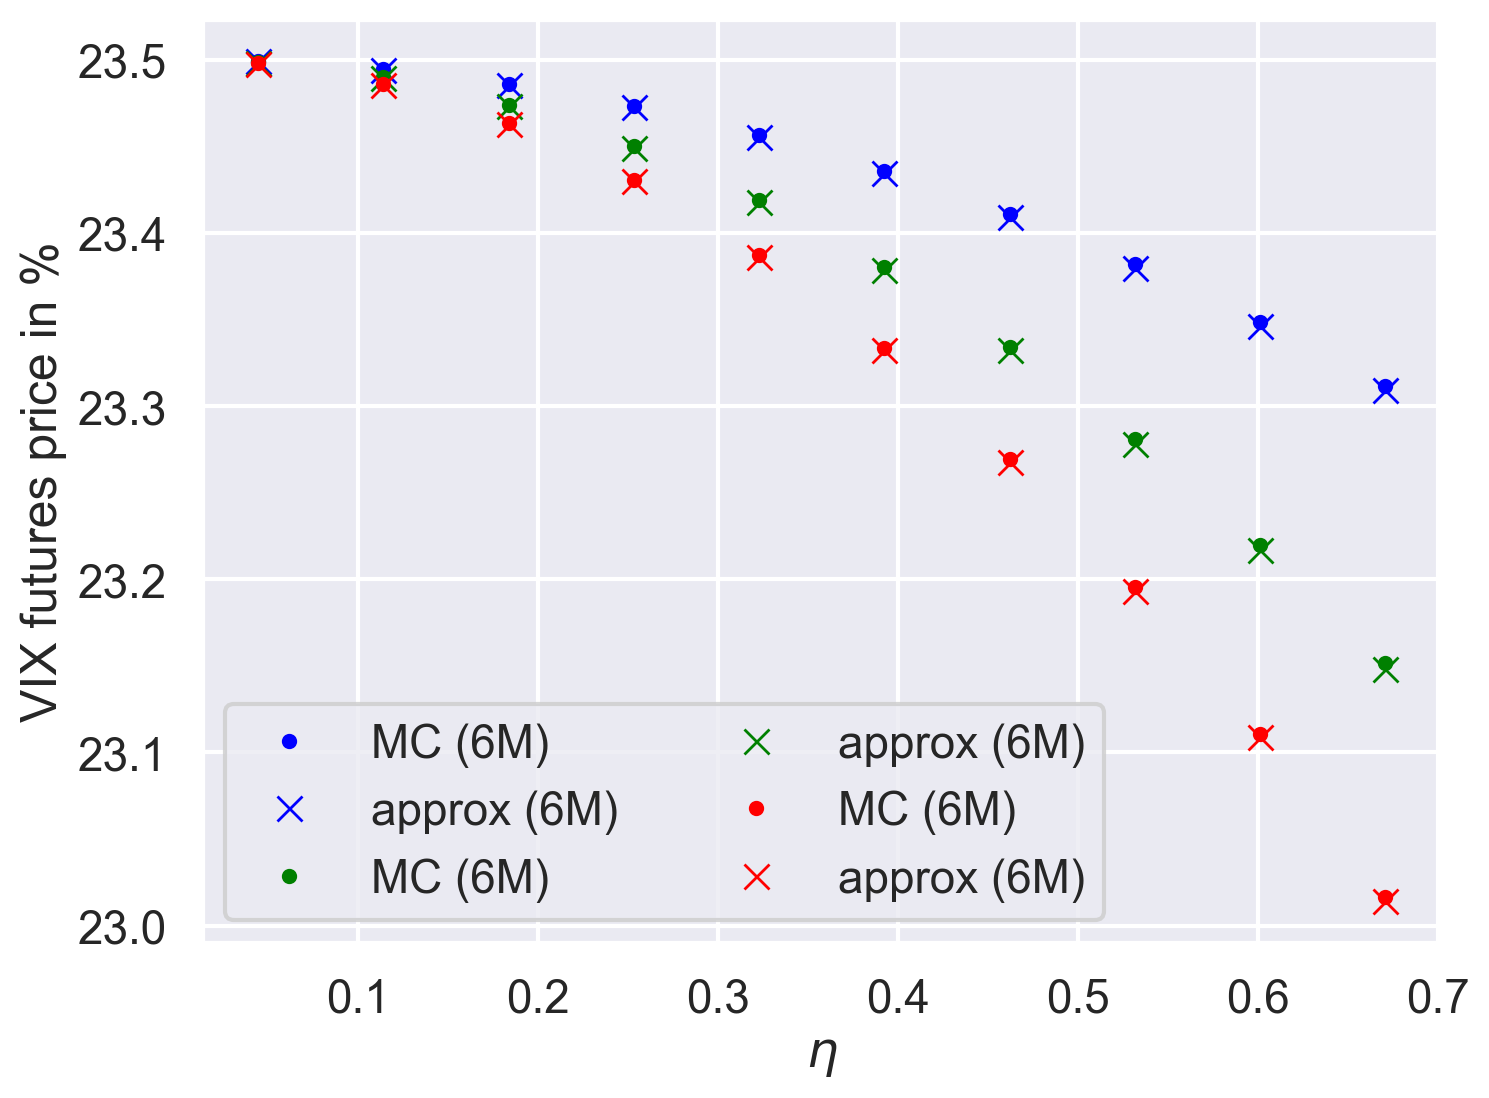

In [13]:
fig, ax = plt.subplots()
for i, T in enumerate(mats):
    ax.plot(
        tab_eta, 100.0 * vix_fut_eta[T], ".", color=colors[i], label=f"MC ({month})"
    )
    ax.plot(
        tab_eta,
        100.0 * vix_fut_eta_approx[T],
        "x",
        color=colors[i],
        label=f"approx ({month})",
    )
ax.set_xlabel("$\\eta$")
ax.set_ylabel("VIX futures price in %")
ax.legend(ncol=2)
plt.show()

Price of VIX futures as function of maturity $T$

In [14]:
params = {
    "s0": 1.0,
    "xi0": lambda u: np.ones_like(u) * 0.235**2,
    "rho": -0.7,
    "H": 0.1,
    "eta": 1.0,
}

rbergomi = RoughBergomi(**params)

tab_t = np.linspace(1.0 / 365.0, 1.0, 10)

In [15]:
vix_fut_t = np.array(
    [rbergomi.price_vix_fut(T=T, n_mc=n_mc, n_disc=n_disc, rule="trap") for T in tab_t]
)

In [16]:
vix_fut_t_approx = np.array(
    [rbergomi.price_vix_fut_approx(T=T, order=3) for T in tab_t]
)

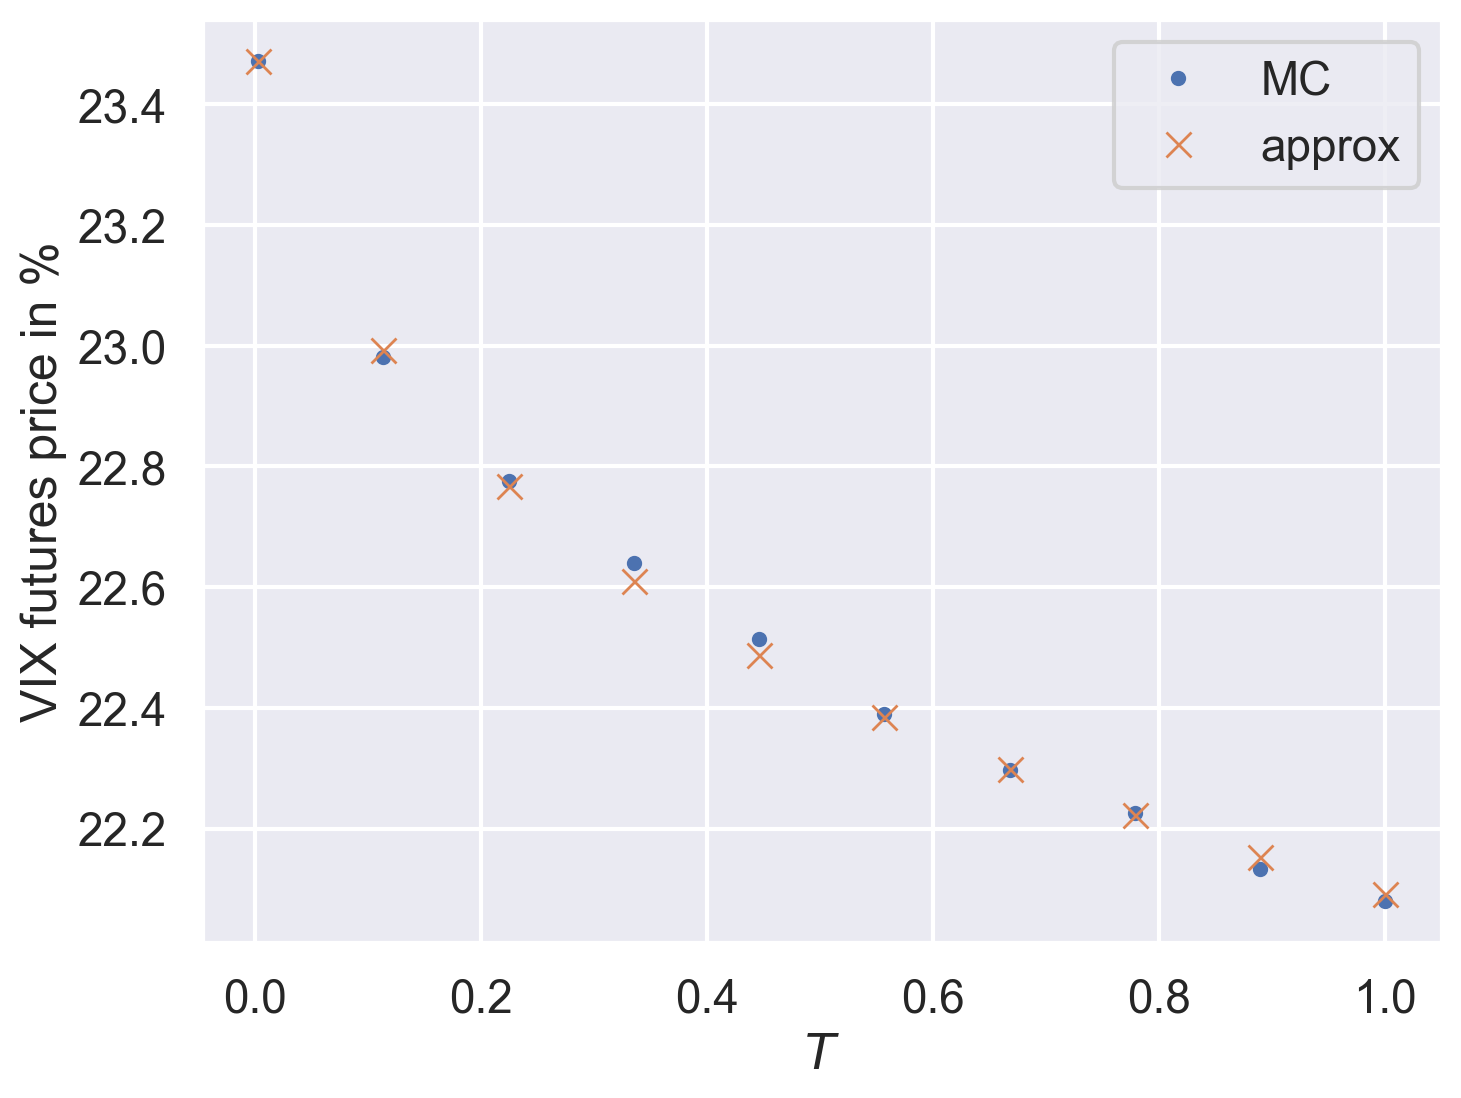

In [22]:
fig, ax = plt.subplots()
ax.plot(tab_t, 100.0 * vix_fut_t, ".", label="MC")
ax.plot(tab_t, 100.0 * vix_fut_t_approx, "x", label="approx")
ax.set_xlabel("$T$")
ax.set_ylabel("VIX futures price in %")
ax.legend()
plt.show()

Price of VIX call options as function of maturity $T$

In [18]:
vix_price_atm = np.array(
    [
        rbergomi.price_vix(k=0.0, T=T, n_mc=n_mc, n_disc=n_disc, rule="trap", opttype=1)
        for T in tab_t
    ]
)

In [19]:
vix_price_atm_approx = np.array(
    [rbergomi.price_vix_approx(k=0.0, T=T, order=3) for T in tab_t]
)

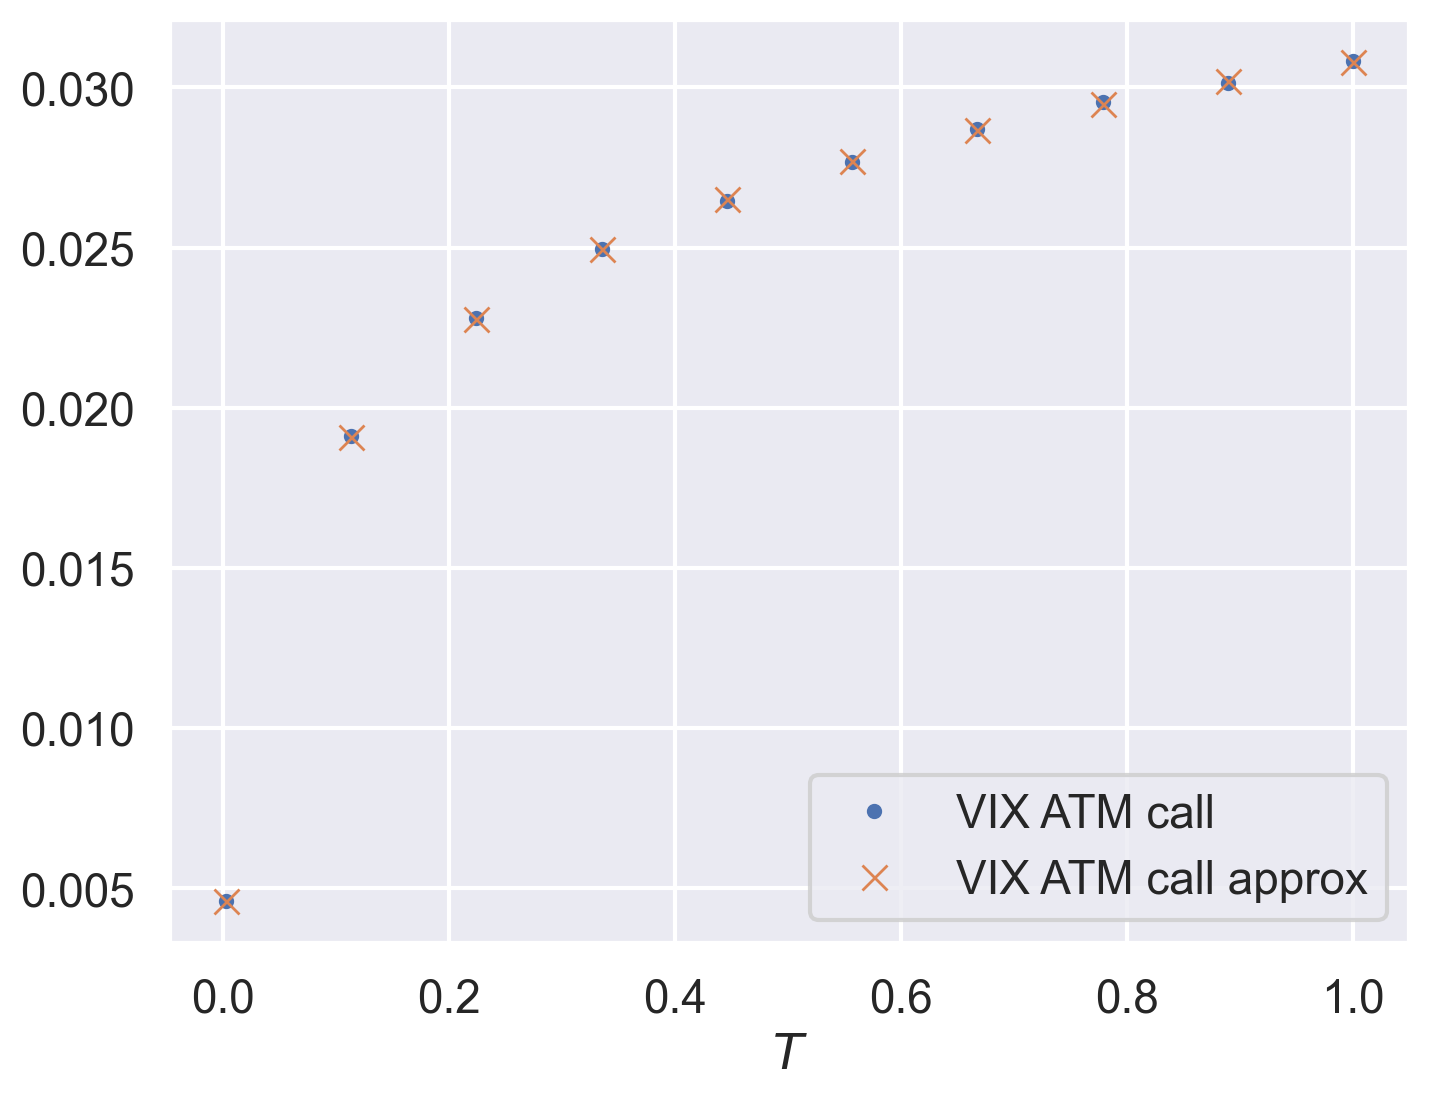

In [21]:
fig, ax = plt.subplots()
ax.plot(tab_t, vix_price_atm, ".", label="VIX ATM call")
ax.plot(tab_t, vix_price_atm_approx, "x", label="VIX ATM call approx")
ax.set_xlabel("$T$")
ax.legend()
plt.show()

VIX implied volatility as function of log-moneyness $k = \log(K/F)$

In [23]:
k = np.linspace(-0.1, 0.5, 11)

impvol_vix = {
    month: rbergomi.implied_vol_vix(k=k, T=T, n_disc=n_disc, n_mc=n_mc, seed=seed)
    for month, T in mats.items()
}

In [24]:
impvol_vix_approx = {
    month: rbergomi.implied_vol_vix_approx(k=k, T=T, order=3)
    for month, T in mats.items()
}

In [25]:
for elem in mats:
    print(elem)

1M
3M
6M


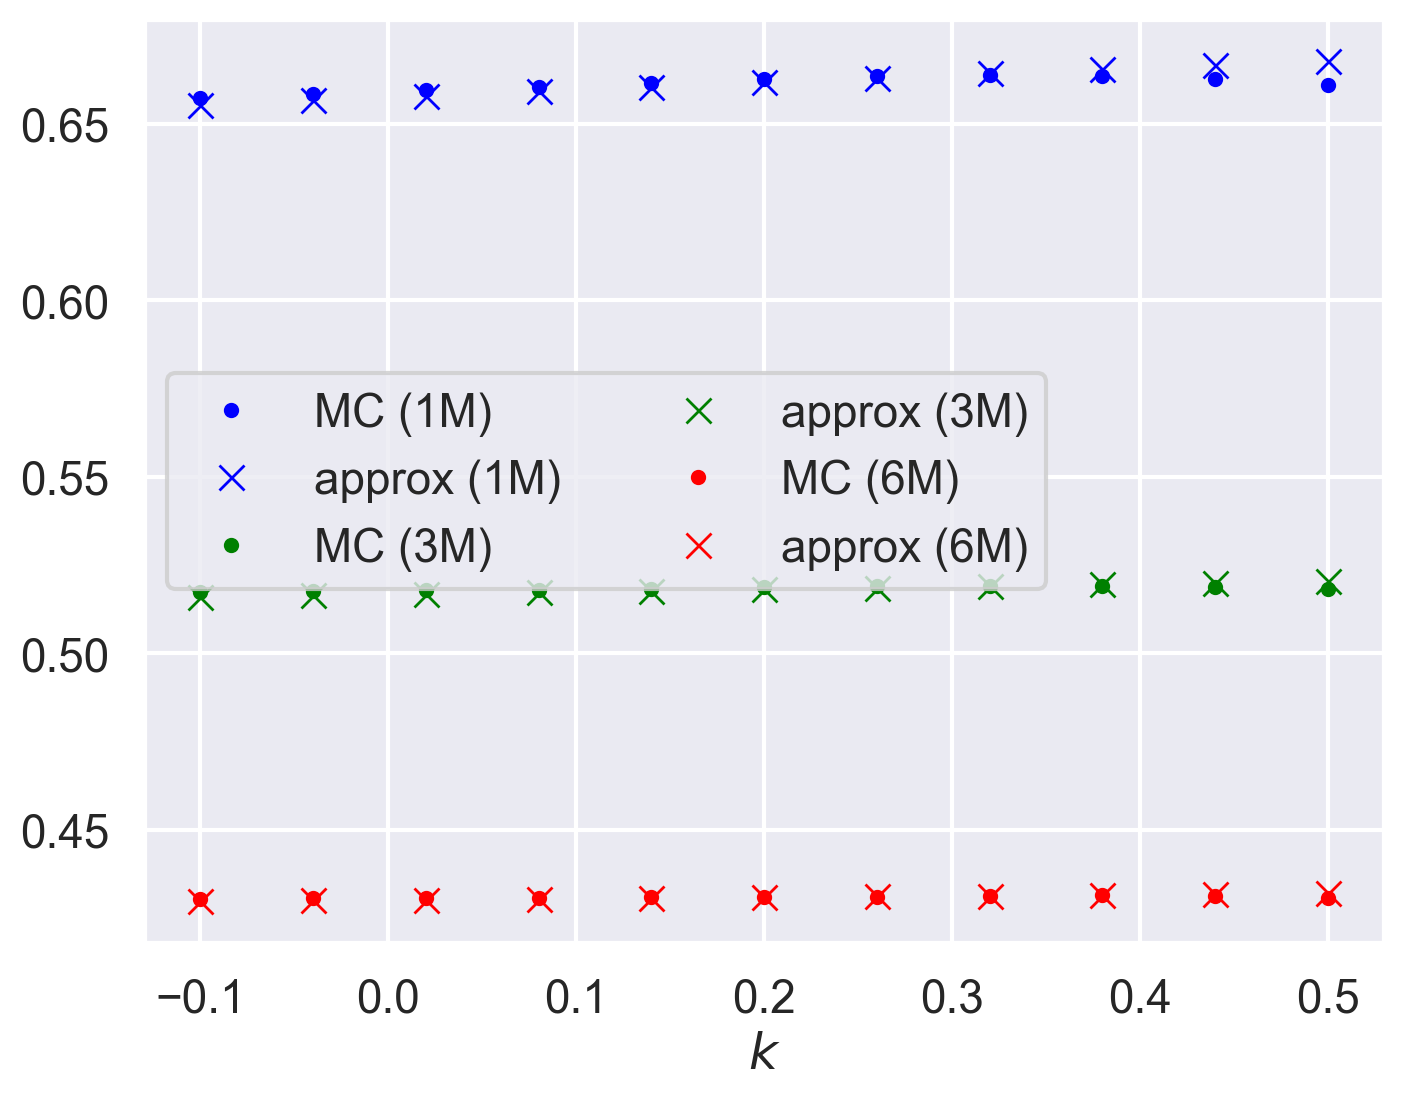

In [26]:
fig, ax = plt.subplots()
for i, month in enumerate(mats.keys()):
    ax.plot(k, impvol_vix[month], ".", color=colors[i], label=f"MC ({month})")
    ax.plot(
        k, impvol_vix_approx[month], "x", color=colors[i], label=f"approx ({month})"
    )
ax.set_xlabel("$k$")
ax.legend(ncol=2)
plt.show()